# Experimentation

This notebook's purpose is to easily experiment some chunks of code. There will be nothing here that actually works. The main purpose is to show my idea walkthourgs. When time passes I am expecting to copy-paste the working code from here to original .py script files.

## Read screen from a web page experiments
(https://github.com/hakanonal/geodashml/projects/1#card-37027228)

26.04.2020 - I have initally googled and bumped into [this](https://stackoverflow.com/questions/38568804/python-open-html-file-take-screenshot-crop-and-save-as-image) and [this](https://stackoverflow.com/questions/38568804/python-open-html-file-take-screenshot-crop-and-save-as-image). 

- Some fooling around with these ideas. 
- it appears that selenium is the right tool to get the screen shot. I still not sure if the scracth version of the game is going to provide the continoues images during playing the game. After all I do not have any idea what the game's runtime. we need to test more if we can get screenshots in a loop so that we can get series of screenshot images to feed into the network.
- I have bumped into selenium installation problem, currentlly trying to resolve, "Message: 'Google\ Chrome.app' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home" error message 
- This [page](https://www.selenium.dev/documentation/en/webdriver/driver_requirements/) seems to be helped a lot. It is the official selenium documentaion page that explains working principle and driver installation. It also re-directs to google's own [page](https://sites.google.com/a/chromium.org/chromedriver/downloads) to download the driver. I have matched my installed chrome application version with the driver version. I have also needed my mac security setting to allow un-trusted code to execute. I have moved it to /usr/local/bin folder. I choose to trust [this](https://sites.google.com/a/chromium.org/chromedriver/home) guys. Consider [security](https://sites.google.com/a/chromium.org/chromedriver/security-considerations) also.

In [15]:
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument('headless')
driver = webdriver.Chrome(executable_path="/usr/local/bin/chromedriver", chrome_options=options)

driver.get('https://scratch.mit.edu/projects/105500895/fullscreen/')
image = driver.find_element_by_id('view').screenshot_as_png

- selenium seems to be working. Now we need if we can get the image that we want. It seems not. It is not rendered properlly.

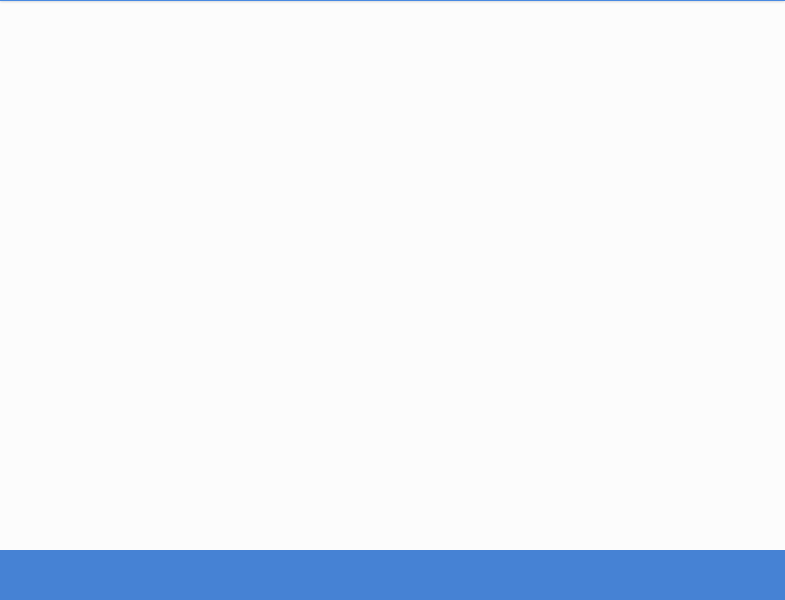

In [18]:
from IPython.display import Image
Image(image)

27.04.2020 - Continue to explore selenium api
- after a blank page I will try different elements to visualize, there may be problem with the flash or html5 or javascript (non-static) elements.
- started to read selenium [webdriver documantation](https://www.selenium.dev/documentation/en/webdriver/waits/) in detail. "Waits" section seems to be promissing
- using the WebDriverWait api has solved the problem.
- waiting is solved the problem but it works inconsistantly. after wating I may need to call find_element function second time. I am planing to fool arround with this code more.
- driver.quit() call seems to be important, underwise the application stays open. 

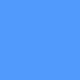

In [31]:
from selenium import webdriver
from IPython.display import Image
from selenium.webdriver.support.ui import WebDriverWait

options = webdriver.ChromeOptions()
options.add_argument('headless')
driver = webdriver.Chrome(executable_path="/usr/local/bin/chromedriver", chrome_options=options)

driver.get('https://scratch.mit.edu/projects/105500895/fullscreen/')
flag_element = WebDriverWait(driver,timeout=5).until(lambda d: d.find_element_by_css_selector(".stage_green-flag-overlay_gNXnv"))
image = flag_element.screenshot_as_png
driver.quit()
Image(image)